### K-means experiments


To explore the dataset, I had to import ‘chardet’ to determine how the csv file was encoded so that I could load and read 

In [2]:
import pandas as pd
import chardet

# Open the file and read a few bytes
with open('AI_Retail_WIP_Eng.csv', 'rb') as f:
    raw_data = f.read(10000)

# Detect encoding
result = chardet.detect(raw_data)
encoding = result['encoding']

# Read CSV with the detected encoding
df = pd.read_csv('AI_Retail_WIP_Eng.csv', encoding=encoding)

df.tail()

,Segment,Mapping,Annual_Salary,Gender,Education,Living_Region,Age,Online_Consumer,Online_Service_Preference,AI_Endorsement,...,Previous Purchases,Purchase Amount,AI_Tools Applied,Item Purchased,Category,Size,Color,Season,Shipping Type,Frequency of Purchases
651,Male_Millennials_Metropolitan_Medium,Male_Millennials,Medium,Male,University Graduate,Metropolitan,Millennials,1,1,0,...,3,51.0,Yes,Socks,Clothing,M,Black,Summer,Store Pickup,Bi-Weekly
652,Male_Millennials_Metropolitan_High,Male_Millennials,High,Male,Highschool Graduate,Metropolitan,Millennials,1,0,0,...,16,50.0,No,Hoodie,Clothing,L,Orange,Summer,Express,Bi-Weekly
653,Male_Millennials_Metropolitan_Medium,Male_Millennials,Medium,Male,University Graduate,Metropolitan,Millennials,1,0,0,...,41,62.0,No,Scarf,Accessories,M,Charcoal,Winter,Free Shipping,Weekly
654,Male_Millennials_Suburban Areas_High,Male_Millennials,High,Male,Highschool Graduate,Suburban Areas,Millennials,1,1,0,...,9,69.0,Yes,Pants,Clothing,M,Lavender,Winter,Next Day Air,Quarterly
655,Prefer 0t to say_Gen Z_Metropolitan_Low,Prefer 0t to say_Gen Z,Low,Prefer 0t to say,University Graduate,Metropolitan,Gen Z,1,1,1,...,3,51.0,Yes,Socks,Clothing,M,Black,Summer,Store Pickup,Bi-Weekly


Started to explore the file

In [3]:
df.describe()

,Online_Consumer,Online_Service_Preference,AI_Endorsement,AI_Privacy_No_Trust,AI_Enhance_Experience,AI_Satisfication,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Number of AI Tools Used,...,Number of Payment Methods Used,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing,Review Rating,Frequency of Purchases (Days),Previous Purchases,Purchase Amount
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,...,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000
mean,0.967988,0.739329,0.844512,0.724085,0.849085,0.818598,0.452744,0.452744,0.381098,1.286585,...,1.323171,0.501524,0.658537,0.429878,0.521341,0.731707,3.778354,53.381098,23.673780,75.486280
std,0.176167,0.439336,0.362646,0.447315,0.358239,0.385645,0.498142,0.498142,0.486027,0.993200,...,0.777045,0.500379,0.474562,0.495436,0.499926,0.443409,0.714680,79.144594,14.501181,33.866383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,7.000000,1.000000,20.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000,14.000000,11.000000,48.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.800000,30.000000,22.000000,71.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.400000,90.000000,36.000000,98.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,360.000000,50.000000,150.000000


This is where I resample the data to improve the model performance. I can increase the amount of synthetic data as needed.

In [4]:
df_bootstrapped = df.sample(n=len(df) * 4, replace=True, random_state=1)

print(f"Original dataset size: {len(df)}")
print(f"Bootstrapped dataset size: {len(df_bootstrapped)}")
df_bootstrapped.tail()

Original dataset size: 656
Bootstrapped dataset size: 2624


,Segment,Mapping,Annual_Salary,Gender,Education,Living_Region,Age,Online_Consumer,Online_Service_Preference,AI_Endorsement,...,Previous Purchases,Purchase Amount,AI_Tools Applied,Item Purchased,Category,Size,Color,Season,Shipping Type,Frequency of Purchases
483,Male_Gen Z_Metropolitan_Medium High,Male_Gen Z,Medium High,Male,University Graduate,Metropolitan,Gen Z,1,1,0,...,41,52.0,Yes,Pants,Clothing,S,Silver,Spring,Free Shipping,Quarterly
61,Female_Gen X_Suburban Areas_Medium High,Female_Gen X,Medium High,Female,University Graduate,Suburban Areas,Gen X,1,1,1,...,12,61.5,Yes,Dress,Clothing,M,Purple,Fall,Store Pickup,Every 3 Months
226,Female_Millennials_Metropolitan_High,Female_Millennials,High,Female,Masters? Degree,Metropolitan,Millennials,1,1,1,...,5,63.0,Yes,Jeans,Clothing,M,Turquoise,Spring,Express,Fortnightly
467,Male_Gen Z_Metropolitan_High,Male_Gen Z,High,Male,Highschool Graduate,Metropolitan,Gen Z,1,1,1,...,15,74.0,Yes,Shirt,Clothing,M,Silver,Summer,Store Pickup,Monthly
469,Male_Gen Z_Suburban Areas_Low,Male_Gen Z,Low,Male,Highschool Graduate,Suburban Areas,Gen Z,1,0,1,...,2,49.0,Yes,Gloves,Accessories,L,Peach,Winter,Next Day Air,Monthly


Reviewing column names for the dataset



In [5]:
columns = df_bootstrapped.columns
print(columns)


Index(['Segment', 'Mapping', 'Annual_Salary', 'Gender', 'Education',
       'Living_Region', 'Age', 'Online_Consumer', 'Online_Service_Preference',
       'AI_Endorsement', 'AI_Privacy_No_Trust ', 'AI_Enhance_Experience',
       'AI_Satisfication', 'AI_Tools_Used _Chatbots',
       'AI_Tools_Used_Virtual_Assistant', 'AI_Tools_Used_Voice&Photo_Search',
       'Number of AI Tools Used', 'Payment_Method_Credit/Debit',
       'Payment_Method_COD', 'Payment_Method_Ewallet',
       'Number of Payment Methods Used', 'Product_Category_Appliances',
       'Product_Category_Electronics', 'Product_Category_Groceries',
       'Product_Category_Personal_Care', 'Product_Category_Clothing',
       'Review Rating', 'Frequency of Purchases (Days)', 'Previous Purchases',
       'Purchase Amount', 'AI_Tools Applied', 'Item Purchased', 'Category',
       'Size', 'Color', 'Season', 'Shipping Type', 'Frequency of Purchases'],
      dtype='object')


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

Encoding all the features in the dataset

In [7]:
label_encoder = LabelEncoder()
df_bootstrapped['Segment'] = label_encoder.fit_transform(df_bootstrapped['Segment'])
df_bootstrapped['Mapping'] = label_encoder.fit_transform(df_bootstrapped['Mapping'])
df_bootstrapped['Age'] = label_encoder.fit_transform(df_bootstrapped['Age'])
df_bootstrapped['Annual_Salary'] = label_encoder.fit_transform(df_bootstrapped['Annual_Salary'])
df_bootstrapped['Gender'] = label_encoder.fit_transform(df_bootstrapped['Gender'])
df_bootstrapped['Education'] = label_encoder.fit_transform(df_bootstrapped['Education'])
df_bootstrapped['Living_Region'] = label_encoder.fit_transform(df_bootstrapped['Living_Region'])
df_bootstrapped['Age'] = label_encoder.fit_transform(df_bootstrapped['Age'])
df_bootstrapped['AI_Tools Applied'] = label_encoder.fit_transform(df_bootstrapped['AI_Tools Applied'])
df_bootstrapped['Item Purchased'] = label_encoder.fit_transform(df_bootstrapped['Item Purchased'])
df_bootstrapped['Category'] = label_encoder.fit_transform(df_bootstrapped['Category'])
df_bootstrapped['Size'] = label_encoder.fit_transform(df_bootstrapped['Size'])
df_bootstrapped['Color'] = label_encoder.fit_transform(df_bootstrapped['Color'])
df_bootstrapped['Season'] = label_encoder.fit_transform(df_bootstrapped['Season'])
df_bootstrapped['Shipping Type'] = label_encoder.fit_transform(df_bootstrapped['Shipping Type'])
df_bootstrapped['Frequency of Purchases'] = label_encoder.fit_transform(df_bootstrapped['Frequency of Purchases'])
df_bootstrapped.tail()

,Segment,Mapping,Annual_Salary,Gender,Education,Living_Region,Age,Online_Consumer,Online_Service_Preference,AI_Endorsement,...,Previous Purchases,Purchase Amount,AI_Tools Applied,Item Purchased,Category,Size,Color,Season,Shipping Type,Frequency of Purchases
483,55,6,3,1,3,0,2,1,1,0,...,41,52.0,1,13,1,2,19,1,2,5
61,12,1,3,0,3,2,1,1,1,1,...,12,61.5,1,5,1,1,17,0,5,2
226,24,3,0,0,2,0,3,1,1,1,...,5,63.0,1,11,1,1,21,1,1,3
467,52,6,0,1,1,0,2,1,1,1,...,15,74.0,1,16,1,1,19,2,5,4
469,61,6,1,1,1,2,2,1,0,1,...,2,49.0,1,6,0,0,15,3,3,4


Creating a dataset using the most important features

In [8]:
lda_test=df_bootstrapped[['Purchase Amount','Review Rating','Previous Purchases','Number of AI Tools Used','Frequency of Purchases (Days)','AI_Enhance_Experience']]

In [11]:
X=lda_test

It appears that the data clusters reasonably well

In [19]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

# Started with 3 clusters
n_clusters = 3

# KMeans model and parameters
model = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to your data
model.fit(X)

# cluster labels
clusters = model.labels_

silhouette_avg = silhouette_score(X, model.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4847775818898767


Attempt to visualise the clusters

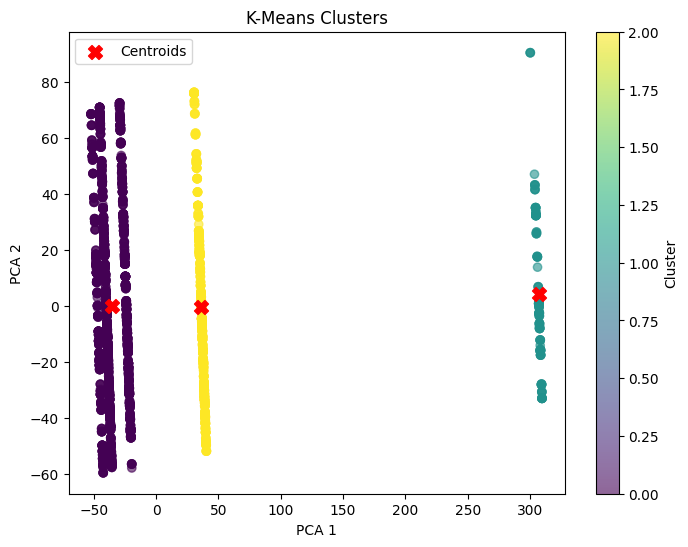

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.values) 

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clusters')


centers_pca = pca.transform(model.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()

Using KMeans & PCA for the visualisation

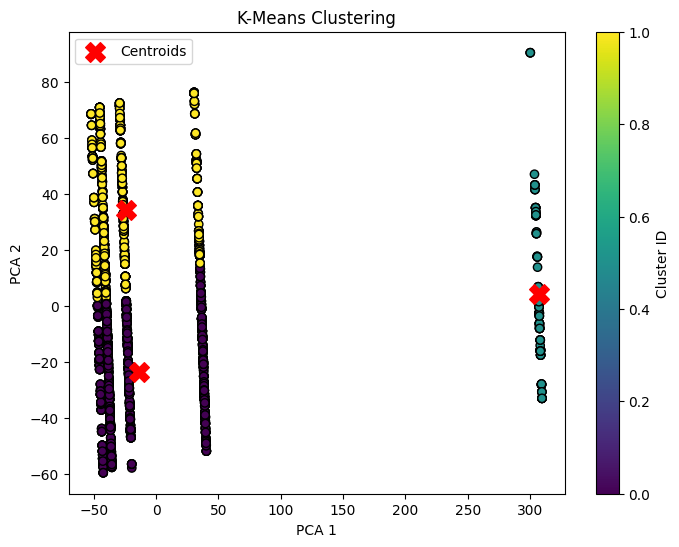

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.values)

# clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', s=200, color='red', label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering')
plt.legend()
plt.colorbar(label='Cluster ID')
plt.show()

Attempt to improve the performance of the cluster using Standard Scaler

In [88]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# subtracts the mean from each feature normalising the data to improve model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use 2 important features
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)


print("Variance Ratio:", pca.explained_variance_ratio_)

Variance Ratio: [0.22927993 0.16305834]


In [93]:
import pandas as pd
from sklearn.cluster import KMeans

# Apply clustering - create 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)


C:\Users\danba\AppData\Local\Temp\ipykernel_20564\319667318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X)


Export output of this experiement to excel spreadsheet

In [96]:
import pandas as pd
from sklearn.cluster import KMeans

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Export data to Excel
X.to_excel("clustered_output.xlsx", index=False)

print("Exported successfully to clustered_output.xlsx")

C:\Users\danba\AppData\Local\Temp\ipykernel_20564\2049323207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X)


Exported successfully to clustered_output.xlsx


Which features have the most impact on the clusters shown. The features with the highest variance have the greatest impact.

In [104]:
import pandas as pd
X.var()

Purchase Amount                  1170.603554
Review Rating                       0.507095
Previous Purchases                211.831383
Number of AI Tools Used             1.007578
Frequency of Purchases (Days)    6516.958535
AI_Enhance_Experience               0.123350
Cluster                             0.707409
dtype: float64